# Assigment 8 - Group 2

In [ ]:
#! pip install chardet

In [1]:
# Install library
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

1. Import data file from people infected with dengue at district level for 2005 to 2021

In [2]:
# Gettting the character format

base = open(r'data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [3]:
# Import csv file from people infected with dengue at district level for 2015 to 2021
data = pd.read_csv(r'data_dengue_peru.csv', encoding = charenc, thousands = ",", dtype={"Ubigeo":"str"})
data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [4]:
data.dtypes

Año                  int64
Semana               int64
Eventos o daños     object
Departamento        object
Distrito            object
Provincia           object
Ubigeo              object
Casos              float64
dtype: object

2. Generate ubigeo for Departments and Provinces taking the first two and four numbers 

In [5]:
data['ubigeo_dpt'] = data['Ubigeo'].astype(str).str[:2]
data['ubigeo_prov'] = data['Ubigeo'].astype(str).str[:4]
data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_dpt,ubigeo_prov
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


3. Plot of numbers of cases in 2021 by the district with continuous legendd

In [6]:
# Import Shape file
data_shp = gpd.read_file( r'C:\Users\VALERIA\Documents\GitHub\Diplomado_PUCP\_data\LIMITE_DISTRITAL_2020_INEI\INEI_LIMITE_DISTRITAL.shp'  )
data_shp

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [7]:
maps = data_shp[['UBIGEO', 'geometry']]
maps = maps.rename({'UBIGEO':'Ubigeo'}, axis =1 )
maps 

,Ubigeo,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [8]:
maps.dtypes

Ubigeo        object
geometry    geometry
dtype: object

In [9]:
# Object or srting to int

maps['Ubigeo'] = maps['Ubigeo'].astype(str).astype(int)
maps

,Ubigeo,geometry
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [10]:
#  WGS-84 (longitud-latitud projection) 
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# Only cases reported in 2021
data_2021 = data[data.Año == 2021]
data_2021 = data_2021.groupby(['Ubigeo'])['Casos'].sum().reset_index().copy()
data_2021['Casos'] = data_2021['Casos'].fillna(0)
data_2021

,Ubigeo,Casos
0,010101,0.0
1,010201,474.0
2,010202,25.0
3,010203,38.0
4,010204,8.0
...,...,...
464,250302,26.0
465,250303,32.0
466,250304,14.0
467,250305,2.0


In [13]:
# Merge datasets
data_2021['Ubigeo'] = data_2021['Ubigeo'].astype(str).astype(int)
dataset_dengue = pd.merge(maps, data_2021, how="inner", on="Ubigeo")
dataset_dengue

,Ubigeo,geometry,Casos
0,140106,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790...",4.0
1,140107,"POLYGON ((-79.66093 -6.90007, -79.65973 -6.900...",0.0
2,140108,"POLYGON ((-79.78014 -6.82123, -79.77781 -6.821...",1.0
3,140115,"POLYGON ((-79.58359 -6.77662, -79.58181 -6.777...",0.0
4,140116,"POLYGON ((-79.44482 -6.82277, -79.44371 -6.823...",1.0
...,...,...,...
464,250106,"POLYGON ((-75.02339 -7.95777, -75.01596 -7.965...",18.0
465,10707,"POLYGON ((-78.47479 -5.93642, -78.47356 -5.937...",0.0
466,10705,"POLYGON ((-78.29526 -5.81005, -78.29476 -5.810...",15.0
467,10203,"POLYGON ((-78.32548 -5.56151, -78.32598 -5.562...",38.0


<AxesSubplot:>

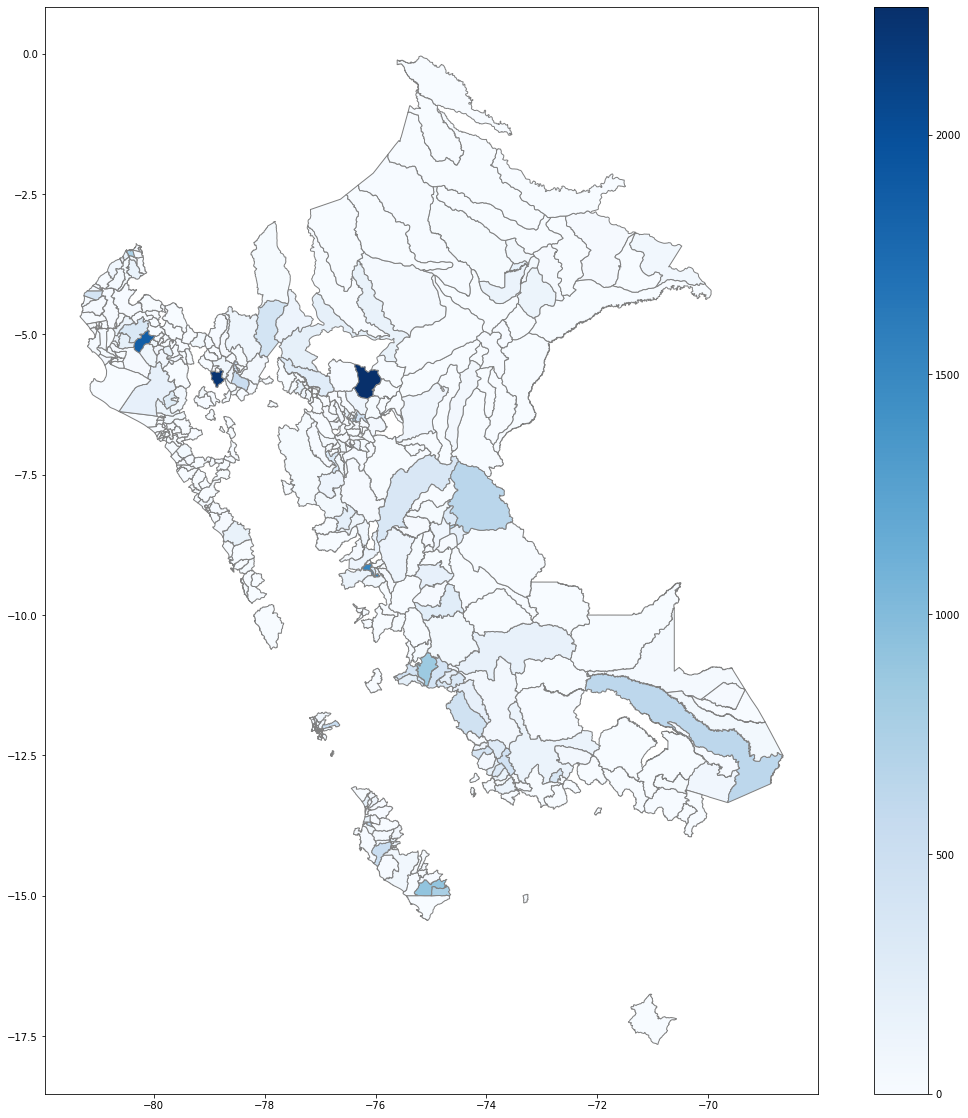

In [14]:
dataset_dengue.plot( column='Casos', cmap='Blues', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

4. Plot of number of cases in 2021 by the province using a continous legend

In [15]:
maps1 = data_shp[['IDPROV', 'geometry']]
maps1 = maps1.rename({'IDPROV':'ubigeo_prov'}, axis =1 )
maps1 

,ubigeo_prov,geometry
0,0605,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,0611,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,0611,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,0611,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,0612,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,0404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,0404,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,0404,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,0404,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [16]:
maps1.dtypes

ubigeo_prov      object
geometry       geometry
dtype: object

In [17]:
# Object or srting to int
maps1['ubigeo_prov'] = maps1['ubigeo_prov'].astype(str).astype(int)
maps1

,ubigeo_prov,geometry
0,605,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,611,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,611,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,611,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,612,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,404,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,404,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,404,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [18]:
#  WGS-84 (longitud-latitud projection) 
maps1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
#data.dtypes
data['ubigeo_prov'] = data['ubigeo_prov'].astype(str).astype(int)
data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_dpt,ubigeo_prov
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [20]:
#data_2021.dtypes
data_prov = data[data.Año == 2021]
df = data_prov.groupby(['ubigeo_prov'])['Casos'].sum().reset_index().copy()
#df['Casos'] = df['Casos'].fillna(0)
df

,ubigeo_prov,Casos
0,101,0.0
1,102,676.0
2,103,0.0
3,104,435.0
4,107,719.0
...,...,...
87,2403,72.0
88,2501,1241.0
89,2502,179.0
90,2503,193.0


In [21]:
# Merge datasets
dataset_prov = pd.merge(df, maps1, on="ubigeo_prov",how="inner")
dataset_prov

,ubigeo_prov,Casos,geometry
0,101,0.0,"POLYGON ((-77.86211 -6.86880, -77.86070 -6.870..."
1,101,0.0,"POLYGON ((-77.93580 -6.69039, -77.93531 -6.690..."
2,101,0.0,"POLYGON ((-77.74017 -6.64825, -77.73967 -6.649..."
3,101,0.0,"POLYGON ((-77.75246 -6.54540, -77.75035 -6.546..."
4,101,0.0,"POLYGON ((-77.66655 -6.57826, -77.66609 -6.578..."
...,...,...,...
775,2503,193.0,"POLYGON ((-75.02136 -8.73948, -75.02136 -8.739..."
776,2503,193.0,"POLYGON ((-75.14649 -8.53886, -75.14614 -8.544..."
777,2503,193.0,"POLYGON ((-75.01663 -8.44514, -75.01650 -8.445..."
778,2503,193.0,"POLYGON ((-75.45297 -8.21007, -75.45304 -8.210..."


In [22]:
dataset_prov= gpd.GeoDataFrame(dataset_prov, geometry=dataset_prov.geometry)

<AxesSubplot:>

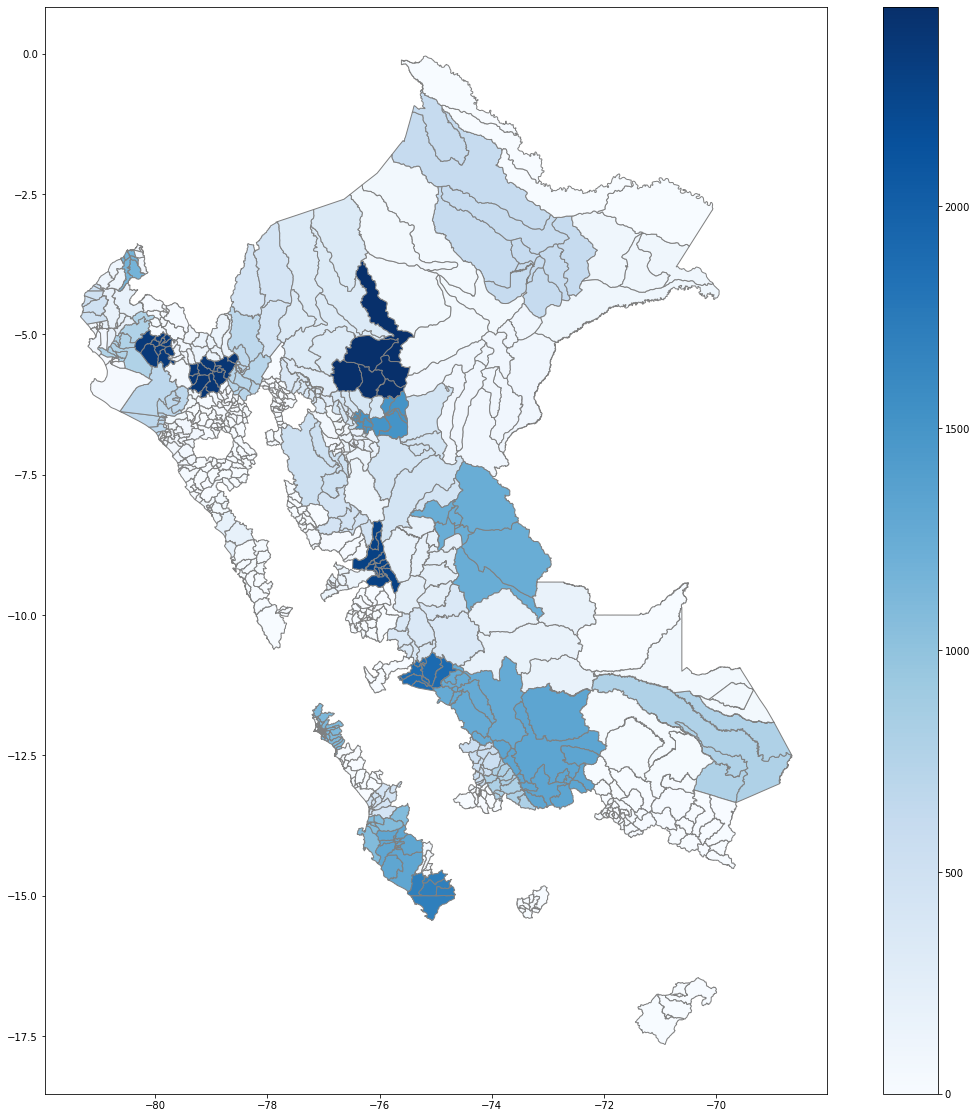

In [23]:
dataset_prov.plot( column='Casos', cmap='Blues', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

5. Plot of number of cases by department for all the years using subplot

In [24]:
maps2 = data_shp[['CCDD', 'geometry']]
maps2 = maps2.dissolve( by ='CCDD').reset_index()
maps2 = maps2.rename({'CCDD':'ubigeo_dpt'}, axis =1 )
maps2 

,ubigeo_dpt,geometry
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,02,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
2,03,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
3,04,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
4,05,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1..."
5,06,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462..."
6,07,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0..."
7,08,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7..."
8,09,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."
9,10,"POLYGON ((-76.80833 -10.39296, -76.81024 -10.3..."


In [25]:
# Object or srting to int
maps2['ubigeo_dpt'] = maps2['ubigeo_dpt'].astype(str).astype(int)
maps2

,ubigeo_dpt,geometry
0,1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,2,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
2,3,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
3,4,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
4,5,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1..."
5,6,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462..."
6,7,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0..."
7,8,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7..."
8,9,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."
9,10,"POLYGON ((-76.80833 -10.39296, -76.81024 -10.3..."


In [26]:
maps2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
#data.dtypes
data['ubigeo_dpt'] = data['ubigeo_dpt'].astype(str).astype(int)
data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_dpt,ubigeo_prov
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,8,809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,8,809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,8,809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [28]:
data_dpto = data.groupby(['ubigeo_dpt'])['Casos'].sum().reset_index().copy()
data_dpto

,ubigeo_dpt,Casos
0,1,3217.0
1,2,2344.0
2,5,8818.0
3,6,4144.0
4,7,11.0
5,8,5916.0
6,10,5695.0
7,11,16588.0
8,12,9841.0
9,13,13844.0


In [29]:
dataset_dpt = pd.merge(maps2, data, on="ubigeo_dpt")
dataset_dpt

,ubigeo_dpt,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo_prov
0,1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,EL PARCO,BAGUA,010204,NaN,102
1,1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,COPALLIN,BAGUA,010203,NaN,102
2,1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,BAGUA GRANDE,UTCUBAMBA,010701,NaN,107
3,1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,EL PARCO,BAGUA,010204,NaN,102
4,1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,COPALLIN,BAGUA,010203,NaN,102
...,...,...,...,...,...,...,...,...,...,...,...
172139,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,49,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503
172140,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,50,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503
172141,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,51,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503
172142,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,52,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0.0,2503


In [ ]:
fig, axis = plt.subplots( nrows = 7, figsize = ( 15, 15 ) )

idx = 0
for i in range( 7 ): 
        
        ax = axis[ i ]
        
        Año = dataset_dpt.Año.unique()[ idx ]
        
        df = dataset_dpt[ dataset_dpt.Año == Año ]
        
        df.plot( column='Casos', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( Año )
        
        idx = idx + 1

6. Plot of number of cases by department for all 2021 quarters using subplots. 

In [ ]:
df = data[data.Año == 2021]

In [ ]:
df['ubigeo_dpt'].describe()

In [ ]:
df['quarter'] = (( df['Semana']-1) // 13 ) + 1

In [ ]:
df.loc[df.quarter == 5, 'quarter'] = 4
df

In [ ]:
data_dpto_2021 = df.groupby(['ubigeo_dpt', 'quarter']).sum().reset_index().copy()
data_dpto_2021

In [ ]:
dataset_quarter = pd.merge(maps2, data_dpto_2021, on="ubigeo_dpt")
dataset_quarter

In [ ]:
fig, axis = plt.subplots( nrows = 2, ncols= 2, figsize = ( 15, 15 ) )

idx = 0
for i in range( 2 ):
    for j in range ( 2 ):
        
        
        ax = axis[ i ][ j ]
        
        quarter = dataset_quarter.quarter.unique()[ idx ]
        
        df = dataset_quarter[ dataset_quarter.quarter == quarter ]
        
        df.plot( column='Casos', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black',
                  missing_kwds= dict(color = "#DADADB",), 
                  classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ),
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( f'Q{quarter}')
        
        idx = idx + 1